<a href="https://colab.research.google.com/github/spookyfish/intro_to_datascience/blob/master/notes/45_Principle_Component_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\newcommand\xX{2}\newcommand\xY{1} xC = [\xX, \xY]$

$
\Sigma = \begin{pmatrix}
2 & 0 \\
0 & 0.5 
\end{pmatrix}
$

$\theta = \pi/3\ \ (60^\circ)$

$
R = \begin{pmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) 
\end{pmatrix}
$

$
X = R \cdot \Sigma \cdot 
\begin{pmatrix}
x_0 & x_1 & \cdots & x_{10000} \\
y_0 & y_1 & \cdots & y_{10000}
\end{pmatrix} 
+
\begin{pmatrix}
\xX & 0 \\
0 & \xY
\end{pmatrix} \cdot
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1
\end{pmatrix}
$

$
= R \cdot \Sigma \cdot 
\begin{pmatrix}
x_0 & x_1 & \cdots & x_{10000} \\
y_0 & y_1 & \cdots & y_{10000}
\end{pmatrix} 
+
\begin{pmatrix}
\xX & \xX & \cdots & \xX \\
\xY & \xY & \cdots & \xY
\end{pmatrix}
$

R: [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
Xavg:  [2.01082474 1.01083581]
U: [[-0.50095941 -0.86547078]
 [-0.86547078  0.50095941]]
S: [2.01964889 0.50148534]
Vt: [[ 0.01055666 -0.0071291  -0.00503956 ... -0.00518109 -0.00283505
   0.00399262]
 [-0.01017478  0.01169773  0.01445127 ...  0.00537175 -0.00269759
  -0.00094621]]


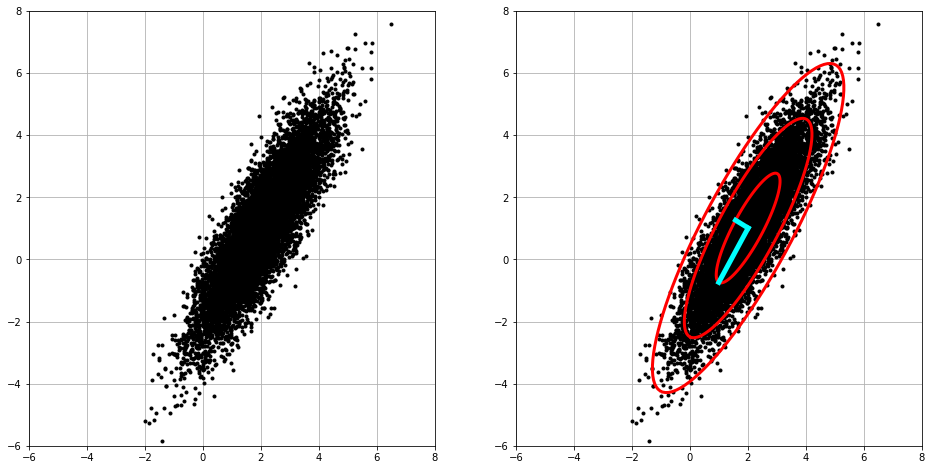

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])
print('R:', R)

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='black')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
print('Xavg: ', Xavg)
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
print('U:', U)
print('S:', S)
print("Vt:", VT)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.show()